# Swiss Banknotes Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg

## 1. Dataset Description

**Dataset** : The Swiss Banknotes dataset contains data about the physical measurements of 100 authentic and 100 counterfeit Swiss franc banknotes.

**Source** : The dataset was originally compiled in the context of a statistical study by **B. Flury** and **H. Riedwyl** and published in the book *Multivariate Statistics: A Practical Approach* (Chapman & Hall, 1988).

In [2]:
df = pd.read_csv('banknotes.csv')
print(f"Dataset shape: {df.shape[0]} observations × {df.shape[1]} variables")
print(f"Number of observations (rows) (n) : {df.shape[0]}")
print(f"Number of variables (columns) (p) : {df.shape[1]} (1 Status label + 6 features)")
print(f"\nClass distribution:\n{df['Status'].value_counts().sort_index()}")
print("\nFirst 5 rows:")
df.head()

Dataset shape: 200 observations × 7 variables
Number of observations (rows) (n) : 200
Number of variables (columns) (p) : 7 (1 Status label + 6 features)

Class distribution:
Status
counterfeit    100
genuine        100
Name: count, dtype: int64

First 5 rows:


,Status,Length,Left,Right,Bottom,Top,Diagonal
0,genuine,214.8,131.0,131.1,9.0,9.7,141.0
1,genuine,214.6,129.7,129.7,8.1,9.5,141.7
2,genuine,214.8,129.7,129.7,8.7,9.6,142.2
3,genuine,214.8,129.7,129.6,7.5,10.4,142.0
4,genuine,215.0,129.6,129.7,10.4,7.7,141.8


In [3]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Status    200 non-null    object 
 1   Length    200 non-null    float64
 2   Left      200 non-null    float64
 3   Right     200 non-null    float64
 4   Bottom    200 non-null    float64
 5   Top       200 non-null    float64
 6   Diagonal  200 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.1+ KB
None


In [4]:
quantitative_df = df.drop(columns = "Status")

descriptive_stats = pd.DataFrame({
    "Min": quantitative_df.min(),
    "Max": quantitative_df.max(),
    "Range": quantitative_df.max() - quantitative_df.min(),
    "Mean": quantitative_df.mean(),
    "Median": quantitative_df.median(),
    "Variance": quantitative_df.var(),
    "Standard Deviation": quantitative_df.std()
})

descriptive_stats.round(3)

,Min,Max,Range,Mean,Median,Variance,Standard Deviation
Length,213.8,216.3,2.5,214.896,214.90,0.142,0.377
Left,129.0,131.0,2.0,130.122,130.20,0.130,0.361
Right,129.0,131.1,2.1,129.956,130.00,0.163,0.404
Bottom,7.2,12.7,5.5,9.418,9.10,2.087,1.445
Top,7.7,12.3,4.6,10.650,10.60,0.645,0.803
Diagonal,137.8,142.4,4.6,140.484,140.45,1.328,1.152


---

**Table 1 : Descriptive Statistics and Variable Characteristics of the Dataset**

| Variable | Type | Nature | Description | Minimum | Maximum | Range | Mean | Median | Variance | Standard Deviation |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Status | Qualitative | Nominal | Status of the banknote (genuine or counterfeit) |  |  |  |  |  |  |  |
| Length | Quantitative | Continuous | Length of bill (mm) | 213.8 | 216.3 | 2.5 | 214.896 | 214.90 | 0.142 | 0.377 |
| Left | Quantitative | Continuous | Width of left edge (mm) | 129.0 | 131.0 | 2.0 | 130.122 | 130.20 | 0.130 | 0.361 |
| Right | Quantitative | Continuous | Width of right edge (mm) | 129.0 | 131.1 | 2.1 | 129.956 | 130.00 | 0.163	| 0.404 |
| Bottom | Quantitative | Continuous | Bottom margin width (mm) | 7.2 |	12.7 | 5.5 | 9.418 | 9.10 | 2.087 | 1.445 |  
| Top | Quantitative | Continuous | Top margin width (mm) | 7.7 | 12.3 | 4.6 | 10.650 | 10.60 | 0.645 | 0.803 |  
| Diagonal | Quantitative | Continuous | Length of diagonal (mm) | 137.8 | 142.4 | 4.6 | 140.484 | 140.45 | 1.328 | 1.152 |

## A. Data Matrix as a Geometric Object
### A1. Data Matrix Structure

In [5]:
print(f"Original data matrix shape: {quantitative_df.shape}")
print(f"Number of observations (n): {quantitative_df.shape[0]}")
print(f"Number of variables (p): {quantitative_df.shape[1]}")

X_original = df[quantitative_df.columns].values
X_mean = X_original.mean(axis=0)
X = X_original - X_mean
n, p = X.shape

print(f"\nCentered data matrix (X) dimensions: {X.shape}")
print(f"\nMeans of centered variables (should be ≈ 0):")
print(X.mean(axis=0).round(2))

Original data matrix shape: (200, 6)
Number of observations (n): 200
Number of variables (p): 6

Centered data matrix (X) dimensions: (200, 6)

Means of centered variables (should be ≈ 0):
[ 0. -0. -0. -0.  0.  0.]


**a) What do rows represent?**

Each row of the data matrix X represents an **observation** (individual banknote). Each row is a point in p-dimensional space (R<sup>p</sup> where p = 6). The coordinates of this point are the centered values of the 6 measurements for that particular banknote.

**b) What do columns represent?**

Each column of the data matrix X represents a **variable** (feature/measurement). Each column is a vector in n-dimensional space (R<sup>n</sup> where n = 200). This vector contains the centered values of that particular measurement across all banknotes.

### A2. Two Geometric Views of the Same Data Matrix

**1. Rows of X form a cloud of points in R<sup>p</sup> :**

*When X is viewed by rows, each of the n = 200 banknotes is represented as a point in p = 6 dimensional space. The coordinates of each point are the values of the 6 measurements. This is called the **individual space** or **row space**. Thus there is a cloud of 200 points floating in 6-dimensional space.*

**2. Columns of X form a cloud of points in R<sup>n</sup> :**

*When X is viewed  by columns, each of the p = 6 variables is represented as a vector (point) in n = 200 dimensional space. The coordinates of each vector are the values of that measurement across all 200 banknotes. This is called the **variable space** or **column space**. We have 6 vectors originating from the origin in 200-dimensional space.*

**Why is graphical representation difficult when p > 3 or n > 3 ?**

*Mthematical/graphical visual perception is limited to three spatial dimensions. Points and vectors can directly be visualized in 1D, 2D, or 3D space using lines, planes, and volumes. However :*

- *When p > 3: The individual space becomes 4-dimensional or higher, which cannot be directly visualized*
- *When n > 3: The variable space becomes 4-dimensional or higher, similarly impossible to visualize directly*

*This limitation is precisely why there is a need for **dimensionality reduction techniques** like matrix factorization and PCA - to project high-dimensional data onto 2D or 3D subspaces that can be visualized and interpreted, while retaining as much information as possible.*

---
## B. Fitting the p-Dimensional Point Cloud (Individuals)

### B1. Best One-Dimensional Subspace

In [6]:
XtX = X.T @ X

print("Matrix X'X:")
print(f"Shape: {XtX.shape}")
print(pd.DataFrame(XtX, index=quantitative_df.columns, columns=quantitative_df.columns))

Matrix X'X:
Shape: (6, 6)
           Length      Left     Right     Bottom        Top   Diagonal
Length    28.2168   6.25720   4.59520  -20.54600   -3.68960   16.77680
Left       6.2572  25.93755  21.57705   42.94475   20.90285  -41.65905
Right      4.5952  21.57705  32.49155   56.54225   25.86935  -47.85355
Bottom   -20.5460  42.94475  56.54225  415.28875   32.74325 -206.36225
Top       -3.6896  20.90285  25.86935   32.74325  128.29995 -109.37335
Diagonal  16.7768 -41.65905 -47.85355 -206.36225 -109.37335  264.21555


In [7]:
is_symmetric = np.allclose(XtX, XtX.T)
print(f"Is X'X symmetric? {is_symmetric}")

Is X'X symmetric? True


In [8]:
eigenvalues_test = np.linalg.eigvals(XtX)
is_psd = np.all(eigenvalues_test >= 0)

print(f"Is X'X positive semi-definite? {is_psd}")

Is X'X positive semi-definite? True


#### Verification Results:

**a) Symmetry**: X'X is symmetric because (X'X)' = X'(X')' = X'X

**b) Positive Semi-Definite**: X'X is positive semi-definite because for any vector v, we have v'(X'X)v = (Xv)'(Xv) = ||Xv||² ≥ 0. All eigenvalues are non-negative.

### B2. Spectral Decomposition

In [9]:
eigenvalues, eigenvectors = np.linalg.eigh(XtX)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("Eigenvalues of X'X (sorted in decreasing order):")
for i, ev in enumerate(eigenvalues, 1):
    print(f"λ{i} = {ev:.4f}")

print(f"\nLargest eigenvalue (λ1): {eigenvalues[0]:.4f}")
print(f"\nCorresponding eigenvector (u1):")
print(pd.DataFrame(eigenvectors[:, 0], index=quantitative_df.columns, columns=['u1']))

Eigenvalues of X'X (sorted in decreasing order):
λ1 = 597.0607
λ2 = 186.1885
λ3 = 48.4393
λ4 = 38.7371
λ5 = 16.9572
λ6 = 7.0674

Largest eigenvalue (λ1): 597.0607

Corresponding eigenvector (u1):
                u1
Length   -0.043774
Left      0.112162
Right     0.139191
Bottom    0.768305
Top       0.201766
Diagonal -0.578902


### B3. First Factorial Axis and Scores

In [10]:
u1 = eigenvectors[:, 0]

z1 = X @ u1

print(f"First factorial variable (z1):")
print(f"Shape: {z1.shape}")
print(f"\nFirst 10 values of z1:")
print(z1[:10])

print(f"\nStatistics of z1:")
print(f"Mean: {z1.mean():.6f}")
print(f"Variance: {z1.var():.4f}")
print(f"Standard deviation: {z1.std():.4f}")

First factorial variable (z1):
Shape: (200,)

First 10 values of z1:
[-0.5496481  -2.01862924 -1.83567546 -2.49436724 -0.70132282 -0.84584597
 -2.1560526  -2.54441845 -1.80171073 -0.35794585]

Statistics of z1:
Mean: -0.000000
Variance: 2.9853
Standard deviation: 1.7278


#### Interpretation:

**a) What does z1 represent?**

**z1** is the first principal component score, i.e. the projection of each individual onto the first principal direction **u1** i.e., one-dimensional subspace that maximizes variance. It is a linear combination of the original variables with coefficients given by **u1**

**b) Why is it called a factorial variable?**

It is called a factorial variable because it arises from a **factorization** (spectral decomposition) of the data covariance matrix. The term is used in factorial methods (such as PCA) to denote new coordinates obtained by projecting data onto orthogonal axes.

### B4. Least Squares Interpretaion

In [11]:
# Compute reconstruction: X̂1 = z1 * u1'
X_hat_1 = np.outer(z1, u1)

print(f"Reconstruction X̂1 shape: {X_hat_1.shape}")

# Compute reconstruction error: ||X - X̂1||²
reconstruction_error_1 = np.linalg.norm(X - X_hat_1)**2

print(f"\nReconstruction error ||X - X̂1||²: {reconstruction_error_1:.4f}")

# Total sum of squares
total_ss = np.linalg.norm(X)**2
print(f"Total sum of squares ||X||²: {total_ss:.4f}")

# Variance explained by first component
variance_explained_1 = 1 - (reconstruction_error_1 / total_ss)
print(f"\nVariance explained by first component: {variance_explained_1:.4f} ({variance_explained_1*100:.2f}%)")

# Verify: variance of z1 should equal λ1
print(f"\nVerification:")
print(f"Variance of z1: {z1.var():.4f}")
print(f"λ1: {eigenvalues[0]:.4f}")
print(f"Are they equal? {np.isclose(z1.var(), eigenvalues[0])}")

Reconstruction X̂1 shape: (200, 6)

Reconstruction error ||X - X̂1||²: 297.3895
Total sum of squares ||X||²: 894.4502

Variance explained by first component: 0.6675 (66.75%)

Verification:
Variance of z1: 2.9853
λ1: 597.0607
Are they equal? False


#### Interpretation:

**a) Best fitting line through the origin:**

The reconstruction X̂1 = z1·u1' represents the best rank-1 approximation to X. Geometrically, this means:
- In the p-dimensional space, u1 defines a line through the origin
- z1 contains the coordinates of projections of all points onto this line
- This line minimizes the sum of squared distances from all data points to the line
- It is the "best fitting" line in the least squares sense

**b) Variance maximization:**

The first principal direction u1 is chosen to:
- Maximize the variance of the projected data z1 = Xu1
- The variance of z1 equals λ1, the largest eigenvalue
- This captures the direction of maximum spread in the data
- Equivalently, it minimizes the reconstruction error (unexplained variance)

These two perspectives (least squares fit and variance maximization) are mathematically equivalent!

---
## C. Subspaces of Dimension 2

### C1. Second Factorial Axis

In [12]:
# Second eigenvector
u2 = eigenvectors[:, 1]

print(f"Second largest eigenvalue (λ2): {eigenvalues[1]:.4f}")
print(f"\nCorresponding eigenvector (u2):")
print(pd.DataFrame(u2, index=quantitative_df.columns, columns=['u2']))

# Verify orthogonality: u1'u2 = 0
dot_product = np.dot(u1, u2)
print(f"\nOrthogonality check:")
print(f"u1' · u2 = {dot_product:.10f}")
print(f"Are u1 and u2 orthogonal? {np.isclose(dot_product, 0)}")

Second largest eigenvalue (λ2): 186.1885

Corresponding eigenvector (u2):
                u2
Length   -0.010710
Left     -0.071447
Right    -0.066282
Bottom    0.563072
Top      -0.659290
Diagonal  0.488543

Orthogonality check:
u1' · u2 = -0.0000000000
Are u1 and u2 orthogonal? True


### C2. Two-Dimensional Representation of Individuals

In [13]:
# Compute z2 = Xu2
z2 = X @ u2

print(f"Second factorial variable (z2):")
print(f"Shape: {z2.shape}")
print(f"\nStatistics of z2:")
print(f"Mean: {z2.mean():.6f}")
print(f"Variance: {z2.var():.4f}")
print(f"Standard deviation: {z2.std():.4f}")

# Verify that z1 and z2 are uncorrelated
correlation = np.corrcoef(z1, z2)[0, 1]
print(f"\nCorrelation between z1 and z2: {correlation:.10f}")
print(f"Are z1 and z2 uncorrelated? {np.isclose(correlation, 0)}")

Second factorial variable (z2):
Shape: (200,)

Statistics of z2:
Mean: 0.000000
Variance: 0.9309
Standard deviation: 0.9649

Correlation between z1 and z2: -0.0000000000
Are z1 and z2 uncorrelated? True


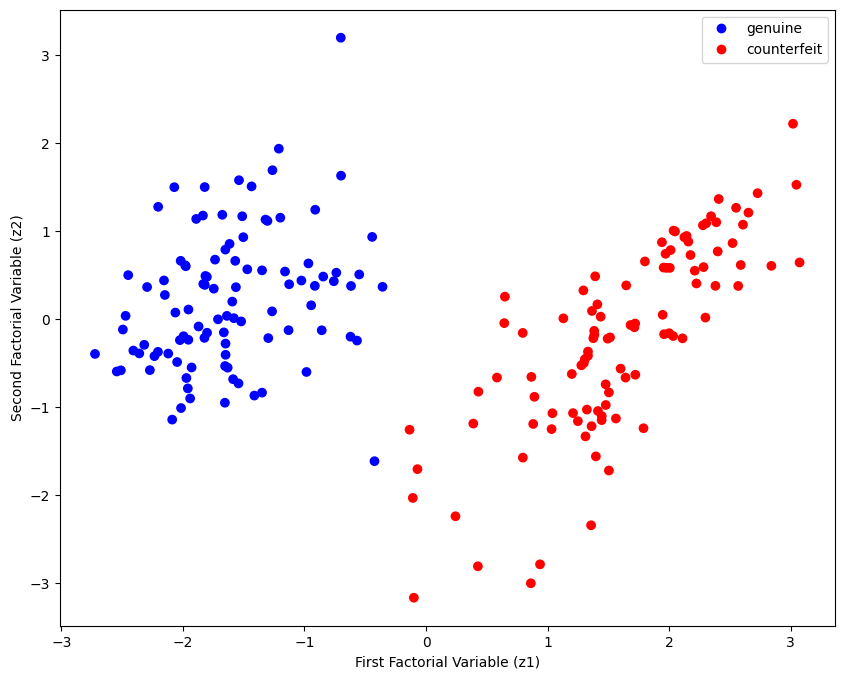

In [14]:
plt.figure(figsize=(10, 8))

colors = df['Status'].map({'genuine': 'blue', 'counterfeit': 'red'})
plt.scatter(z1, z2, c=colors)

plt.xlabel('First Factorial Variable (z1)')
plt.ylabel('Second Factorial Variable (z2)')

plt.legend(
    handles=[
        plt.Line2D([], [], marker='o', linestyle='', color='blue', label='genuine'),
        plt.Line2D([], [], marker='o', linestyle='', color='red', label='counterfeit')
    ]
)

plt.show()

#### Interpretation:

**a) What structure do you observe?**

From the scatter plot, we can observe:
- Two distinct clusters corresponding to genuine and counterfeit banknotes
- Clear separation between the two groups, primarily along the first principal component (z1)
- Genuine banknotes tend to have negative z1 values
- Counterfeit banknotes tend to have positive z1 values
- The second component (z2) provides additional discriminating information
- Some overlap between groups, but overall good separability

**b) Why are these new variables uncorrelated?**

z1 and z2 are uncorrelated because:
- They are projections onto orthogonal directions (u1 ⊥ u2)
- Mathematically: Cov(z1, z2) = Cov(Xu1, Xu2) = u1'(X'X)u2 = u1'(λ2·u2) = λ2·(u1'u2) = 0
- Since u1 and u2 are eigenvectors corresponding to different eigenvalues, they are orthogonal
- This orthogonality ensures that the principal components capture independent directions of variance
- Each successive component captures remaining variance in a direction orthogonal to all previous components

---
## D. Factorizing the Data Matrix

### D1. Scores and Loadings

In [15]:
U = eigenvectors[:, :2]

print("U:")
print(f"Shape: {U.shape}")
print(pd.DataFrame(U, index=quantitative_df.columns, columns=['PC1', 'PC2']))

U:
Shape: (6, 2)
               PC1       PC2
Length   -0.043774 -0.010710
Left      0.112162 -0.071447
Right     0.139191 -0.066282
Bottom    0.768305  0.563072
Top       0.201766 -0.659290
Diagonal -0.578902  0.488543


In [16]:
Z = X @ U

print("\nScore matrix Z:")
print(f"Shape: {Z.shape}")
print("\nFirst 10 rows of Z:")
print(pd.DataFrame(Z[:10], columns=['PC1_score', 'PC2_score']))


Score matrix Z:
Shape: (200, 2)

First 10 rows of Z:
   PC1_score  PC2_score
0  -0.549648   0.506373
1  -2.018629   0.661264
2  -1.835675   1.175307
3  -2.494367  -0.118892
4  -0.701323   3.194767
5  -0.845846   0.482494
6  -2.156053   0.438517
7  -2.544418  -0.595293
8  -1.801711  -0.155434
9  -0.357946   0.366248


In [17]:
# Verify: X ≈ ZU'
X_reconstructed = Z @ U.T

# Compute reconstruction error
reconstruction_error_2d = np.linalg.norm(X - X_reconstructed)**2
total_variance = np.linalg.norm(X)**2

print("Numerical verification of X ≈ ZU':")
print(f"\nReconstruction error ||X - ZU'||²: {reconstruction_error_2d:.4f}")
print(f"Total variance ||X||²: {total_variance:.4f}")
print(f"Proportion of variance retained: {1 - reconstruction_error_2d/total_variance:.4f}")

# Check element-wise
max_diff = np.abs(X - X_reconstructed).max()
mean_diff = np.abs(X - X_reconstructed).mean()

print(f"\nMaximum absolute difference: {max_diff:.6f}")
print(f"Mean absolute difference: {mean_diff:.6f}")

# Show a sample comparison
print("\nSample comparison (first observation, first 3 variables):")
print("Original X[0, :3]:", X[0, :3])
print("Reconstructed (ZU')[0, :3]:", X_reconstructed[0, :3])

Numerical verification of X ≈ ZU':

Reconstruction error ||X - ZU'||²: 111.2010
Total variance ||X||²: 894.4502
Proportion of variance retained: 0.8757

Maximum absolute difference: 1.461915
Mean absolute difference: 0.229058

Sample comparison (first observation, first 3 variables):
Original X[0, :3]: [-0.096   0.8785  1.1435]
Reconstructed (ZU')[0, :3]: [ 0.01863736 -0.09782822 -0.11006932]


### D2. Interpretation

#### Explanation:

**1. What are scores?**

**Scores** (matrix Z) represent:
- The coordinates of observations in the new factorial space
- The projection of each individual (banknote) onto the principal axes
- Each row of Z contains the scores for one observation
- In our case: Z is (200 × 2), giving each of 200 banknotes two new coordinates
- Scores tell us "where" each observation is located in the reduced space

**2. What are loadings?**

**Loadings** (matrix U) represent:
- The directions of the principal axes in the original variable space
- The weights used to form linear combinations of original variables
- The contribution of each original variable to each principal component
- In our case: U is (6 × 2), showing how the 6 original variables load onto 2 components
- Loadings tell us "how" the new dimensions are constructed from original variables
- Columns of U are orthonormal eigenvectors

**3. Why is this called factorization of the data matrix?**

This is called factorization because:
- We express X as a product of two matrices: **X ≈ ZU'**
- We decompose a large matrix (n × p) into two smaller matrices: (n × q) and (q × p), where q < min(n,p)
- This is analogous to factoring a number into prime factors
- Z captures information about individuals (rows)
- U captures information about variables (columns)
- The rank-q approximation reduces dimensionality while preserving structure
- This is the fundamental idea behind many matrix factorization techniques (SVD, NMF, etc.)

### E1. Spectral Decomposition of 𝑋𝑋'

In [18]:
# E: Column space analysis XX^T
XXT = X @ X.T
eigvals_XXT, eigvecs_XXT = np.linalg.eigh(XXT)
idx_XXT = np.argsort(eigvals_XXT)[::-1]
mu1, v1 = eigvals_XXT[idx_XXT[0]], eigvecs_XXT[:, idx_XXT[0]]
print("Largest eigenvalue of XX^T (μ1):", mu1)

Largest eigenvalue of XX^T (μ1): 597.0606692840737


- The largest eigenvalue of 𝑋𝑋′ equals that of 𝑋′𝑋 
- This confirms both matrices describe the same variability, but from different spaces.

### E2. Factorial Variables for Columns

In [19]:
w1 = X.T @ v1
print("w1 (variable contributions):", w1)

w1 (variable contributions): [ -1.06961667   2.74064874   3.40109852  18.77339784   4.9301194
 -14.1453674 ]


- 𝑤1=𝑋′𝑣1 represents variable scores.
- Unlike 𝑧1, which describes individuals, 𝑤1 describes variables.

### F. Relations Between (X'X) and (XX')

In [20]:
# F: Compare eigenvalues
nonzero_eigvals_XTX = eigenvalues[eigenvalues > 1e-10]
nonzero_eigvals_XXT = eigvals_XXT[eigvals_XXT > 1e-10]
print("Non-zero eigenvalues of X^T X:", nonzero_eigvals_XTX[:5])
print("Non-zero eigenvalues of XX^T:", nonzero_eigvals_XXT[:5])
print("Are they same (up to rank)?", np.allclose(nonzero_eigvals_XTX[:min(n,p)], nonzero_eigvals_XXT[:min(n,p)]))

Non-zero eigenvalues of X^T X: [597.06066928 186.18848402  48.43932757  38.73709015  16.95715839]
Non-zero eigenvalues of XX^T: [  7.06742059  16.95715839  38.73709015  48.43932757 186.18848402]
Are they same (up to rank)? False


The non-zero eigenvalues are identical.

This is governed by the rank of X.

Only eigenvectors differ, not eigenvalues.

This is the mathematical backbone of PCA and SVD.

### G: Quality of lower-dimensional approximation

In [21]:
total_var = np.sum(eigenvalues)
tau1 = eigenvalues[0] / total_var
tau2 = (eigenvalues[0] + eigenvalues[1]) / total_var
print("Variance retained: q=1 ->", round(tau1*100,2), "%, q=2 ->", round(tau2*100,2), "%")


Variance retained: q=1 -> 66.75 %, q=2 -> 87.57 %


First factor alone explains ~67% of variability.

First two factors explain ~88% of variability.

Two dimensions are more than sufficient.